# CTU-13 Feature Engineering and EDA
---
After writing a simple program to process the 13 binetflow files a summary of each file and their labeled flows as well as the total flows was produced. This is the same table as theone provided by the CTU-13 dataset webpage.

However there were some slight discrepencies between my summary and the existing summary.


### Reproduced Summary
|Scen.|Total Flows|Botnet Flows|Normal Flows|C&C Flows|Background Flows|
|---|---|---|---|---|---|
|1|2824636|40961(1.45%)|30387(1.08%)|341(0.01%)|2753288(97.47%)|
|2|1808122|20941(1.16%)|9120(0.50%)|673(0.04%)|1778061(98.34%)|
|3|4710638|26822(0.57%)|116887(2.48%)|63(0.00%)|4566929(96.95%)|
|4|129832|901(0.69%)|4679(3.60%)|24(0.02%)|124252(95.70%)|
|5|1925149|40003(2.08%)|31939(1.66%)|536(0.03%)|1853207(96.26%)|
|6|1121076|2580(0.23%)|25268(2.25%)|52(0.00%)|1093228(97.52%)|
|7|114077|63(0.06%)|1677(1.47%)|26(0.02%)|112337(98.47%)|
|8|2954230|6127(0.21%)|72822(2.47%)|1074(0.04%)|2875281(97.33%)|
|9|558919|4630(0.83%)|7494(1.34%)|199(0.04%)|546795(97.83%)|
|10|2087508|184987(8.86%)|29967(1.44%)|2973(0.14%)|1872554(89.70%)|
|11|107251|8164(7.61%)|2718(2.53%)|2(0.00%)|96369(89.85%)|
|12|1309791|106352(8.12%)|15847(1.21%)|33(0.00%)|1187592(90.67%)|
|13|325471|2168(0.67%)|7628(2.34%)|25(0.01%)|315675(96.99%)|

### Original CTU-13 Summary
![CTU-13 Dataset Summary](http://mcfp.weebly.com/uploads/1/1/2/3/11233160/7883961.jpg?728)

---

It can be seen that there are some slight discrepencies between the flow values and their percentages. They may be negligible in the long run. 

The code I used to produce the summary can be found [here](https://github.com/corysabol/binetflow-botnet-detect/blob/master/src/sample.py).

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import ipaddress
from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing
from functools import reduce

### Sample of the data
---

In [2]:
%%time
dataset_path = os.path.join('/media/thiago/ubuntu/datasets/network/','stratosphere-botnet-2011/ctu-13/raw/')
directory = os.fsencode(dataset_path)

files = os.listdir(directory)
sample_file = files[10]
print("Directory: ", directory)
print("Files: ", files)
print("Sample File: ", sample_file)

# read the file with pandas
df = pd.read_csv(os.path.join(directory, sample_file).decode('utf-8'), low_memory=False, dtype={'Label':'str'})

# data overview
print("\nData Shape: ", df.shape)
# print("\nProto:\n", df['Proto'].value_counts())
# print("\nSrcAddr:\n", df['SrcAddr'].value_counts())
# print("\nDstAddr:\n", df['DstAddr'].value_counts())
# print("\nDport:\n", df['Dport'].value_counts())
# print("\nState:\n", df['State'].value_counts())
# print("\nsTos:\n", df['sTos'].value_counts())
# print("\ndTos:\n", df['dTos'].value_counts())
# print("\nLabel:\n", df['Label'].value_counts())

Directory:  b'/media/thiago/ubuntu/datasets/network/stratosphere-botnet-2011/ctu-13/raw/'
Files:  [b'capture20110810.binetflow', b'capture20110811.binetflow', b'capture20110812.binetflow', b'capture20110815-2.binetflow', b'capture20110815-3.binetflow', b'capture20110815.binetflow', b'capture20110816-2.binetflow', b'capture20110816-3.binetflow', b'capture20110816.binetflow', b'capture20110817.binetflow', b'capture20110818-2.binetflow', b'capture20110818.binetflow', b'capture20110819.binetflow']
Sample File:  b'capture20110818-2.binetflow'

Data Shape:  (107251, 15)
CPU times: user 263 ms, sys: 20.2 ms, total: 284 ms
Wall time: 284 ms


In [3]:
print("\nData Shape: ", df.shape)
print("\nData Types: ", df.dtypes)
df.head()
# data overview
# print("\nProto:\n", df['Proto'].value_counts())
# print("\nSrcAddr:\n", df['SrcAddr'].value_counts())
# print("\nDstAddr:\n", df['DstAddr'].value_counts())
# print("\nDport:\n", df['Dport'].value_counts())
# print("\nState:\n", df['State'].value_counts())
# print("\nsTos:\n", df['sTos'].value_counts())
# print("\ndTos:\n", df['dTos'].value_counts())
# print("\nLabel:\n", df['Label'].value_counts())


Data Shape:  (107251, 15)

Data Types:  StartTime     object
Dur          float64
Proto         object
SrcAddr       object
Sport         object
Dir           object
DstAddr       object
Dport         object
State         object
sTos         float64
dTos         float64
TotPkts        int64
TotBytes       int64
SrcBytes       int64
Label         object
dtype: object


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 15:40:53.826372,2.983247,tcp,76.76.172.248,63577,->,147.32.84.229,13363,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established
1,2011/08/18 15:40:55.435494,2.906029,tcp,76.76.172.248,63580,->,147.32.84.229,443,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established
2,2011/08/18 15:40:57.060613,3.030517,tcp,76.76.172.248,63582,->,147.32.84.229,80,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established
3,2011/08/18 15:40:56.809619,6.016227,tcp,76.76.172.248,63577,->,147.32.84.229,13363,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established
4,2011/08/18 15:40:58.341523,6.124715,tcp,76.76.172.248,63580,->,147.32.84.229,443,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established


In [4]:
# feature engineering
le = preprocessing.LabelEncoder()

# [Protocol] - Discard ipv6-icmp and categorize
# df = df[df.Proto != 'ipv6-icmp']
df['Proto'] = df['Proto'].fillna('-')
df['Proto'] = le.fit_transform(df['Proto'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# [Label] - Categorize 
anomalies = df.Label.str.contains("Botnet")
normal = np.invert(anomalies);
df.loc[anomalies, 'Label'] = int(1)
df.loc[normal, 'Label'] = int(0)
df['Label'] = pd.to_numeric(df['Label'])

# [Dport] - replace NaN with 0 port number
df['Dport'] = df['Dport'].fillna('0')
df['Dport'] = df['Dport'].apply(lambda x: int(x,0))

# [sport] - replace NaN with 0 port number
df['Sport'] = df['Sport'].fillna('0')
df['Sport'] = df['Sport'].apply(lambda x: int(x,0))

# [sTos] - replace NaN with "10" and convert to int
df['sTos'] = df['sTos'].fillna('10')
df['sTos'] = df['sTos'].astype(int)

# [dTos] - replace NaN with "10" and convert to int
df['dTos'] = df['dTos'].fillna('10')
df['dTos'] = df['dTos'].astype(int)

# [State] - replace NaN with "-" and categorize
df['State'] = df['State'].fillna('-')
df['State'] = le.fit_transform(df['State'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# [Dir] - replace NaN with "-" and categorize 
df['Dir'] = df['Dir'].fillna('-')
df['Dir'] = le.fit_transform(df['Dir'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# [SrcAddr] Extract subnet features and categorize
df['SrcAddr'] = df['SrcAddr'].fillna('0.0.0.0')
# tmp_df = pd.DataFrame(df['SrcAddr'].str.split('.').tolist(), columns = ['1','2','3','4'])
# df["SrcAddr1"] = tmp_df["1"]
# df["SrcAddr2"] = tmp_df["1"].map(str) + tmp_df["2"]
# df["SrcAddr3"] = tmp_df["1"].map(str) + tmp_df["2"].map(str) + tmp_df["3"]
# df['SrcAddr0'] = le.fit_transform(df['SrcAddr'])
# le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# df['SrcAddr1'] = df['SrcAddr1'].astype(int)
# df['SrcAddr2'] = df['SrcAddr2'].astype(int)
# df['SrcAddr3'] = df['SrcAddr3'].astype(int)

# [DstAddr] Extract subnet features
df['DstAddr'] = df['DstAddr'].fillna('0.0.0.0')
# tmp_df = pd.DataFrame(df['DstAddr'].str.split('.').tolist(), columns = ['1','2','3','4'])
# df["DstAddr1"] = tmp_df["1"]
# df["DstAddr2"] = tmp_df["1"].map(str) + tmp_df["2"]
# df["DstAddr3"] = tmp_df["1"].map(str) + tmp_df["2"].map(str) + tmp_df["3"]
# df['DstAddr0'] = le.fit_transform(df['DstAddr'])
# df['DstAddr1'] = df['DstAddr1'].astype(int)
# df['DstAddr2'] = df['DstAddr2'].astype(int)
# df['DstAddr3'] = df['DstAddr3'].astype(int)

# [StartTime] - Parse to datatime, reindex based on StartTime, but first drop the ns off the time stamps
df['StartTime'] = df['StartTime'].apply(lambda x: x[:19])
df['StartTime'] = pd.to_datetime(df['StartTime'])
df = df.set_index('StartTime')

In [5]:
print(df.dtypes)
df.head()

Dur         float64
Proto         int64
SrcAddr      object
Sport         int64
Dir           int64
DstAddr      object
Dport         int64
State         int64
sTos          int64
dTos          int64
TotPkts       int64
TotBytes      int64
SrcBytes      int64
Label         int64
dtype: object


,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
StartTime,,,,,,,,,,,,,,
2011-08-18 15:40:53,2.983247,10,76.76.172.248,63577,0,147.32.84.229,13363,149,0,0,3,184,122,0
2011-08-18 15:40:55,2.906029,10,76.76.172.248,63580,0,147.32.84.229,443,149,0,0,3,184,122,0
2011-08-18 15:40:57,3.030517,10,76.76.172.248,63582,0,147.32.84.229,80,149,0,0,3,184,122,0
2011-08-18 15:40:56,6.016227,10,76.76.172.248,63577,0,147.32.84.229,13363,149,0,0,3,184,122,0
2011-08-18 15:40:58,6.124715,10,76.76.172.248,63580,0,147.32.84.229,443,149,0,0,3,184,122,0


In [6]:
# %%time
# v_features = [
#     'Dur',
#     'Proto',
#     'Dir',
#     'Dport',
#     'State',
#     'TotPkts',
#     'TotBytes',
#     'SrcBytes'
# #     ,
# #     'SrcAddr0',
# #     'DstAddr0',
# #     'DstAddr1',
# #     'DstAddr2',
# #     'DstAddr3'
# ]

# nplots=np.size(v_features)
# plt.figure(figsize=(15,4*nplots))
# gs = gridspec.GridSpec(nplots,1)
# for i, cn in enumerate(df[v_features]):
#     ax = plt.subplot(gs[i])
# #     print(cn)
#     sns.distplot(df[cn][df.Label == 1], bins=10, label='anomaly', color='r')
#     sns.distplot(df[cn][df.Label == 0], bins=10, label='normal', color='b')
#     ax.set_xlabel('')
#     ax.set_title('feature: ' + str(cn))
#     plt.legend()
# plt.savefig('distplot_df.png')
# plt.show()

In [7]:
# %%time
# corr = df.corr()
# fig, ax = plt.subplots(figsize=(15,10))
# sns_plot = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, ax=ax)
# figure = sns_plot.get_figure()
# figure.savefig('corr_df.png', dpi=400)

In [8]:
# %%time
# # drops N/A values
# tmp_df = df.dropna()

# # Create a scatter matrix of the aggregated dataframe
# # choose a few interesting features to pairplot based on the heat maps
# plot_features = ['Dur','Proto','Dir','Dport','State','sTos','dTos','TotPkts','Label']
# sns_plot = sns.pairplot(tmp_df, vars=plot_features, hue='Label')
# sns_plot.savefig("pairplot_df.png")

### Take a look at the distribution of the data
---
We want to grab 1 second intervals of flows and extract the features of each interval, and
produce a new DataFrame whose columns are our features and rows are the results of computing the
features on each 1s time interval.

### The features

|Features|
|:-------------------|:----------------------|
|0  n_dports>1024    |1 background_flow_count|
|2  n_s_a_p_address  |3 avg_duration         |
|4  n_s_b_p_address  |5 n_sports<1024        |
|6  n_sports>1024    |7 n_conn               |
|8  n_s_na_p_address |9 n_udp                |
|10 n_icmp           |11 n_d_na_p_address    |
|12 n_d_a_p_address  |13 n_s_c_p_address     |
|14 n_d_c_p_address  |15 normal_flow_count   |
|16 n_dports<1024    |17 n_d_b_p_address     |
|18 n_tcp            |19 n_ipv6              |

We may also want to look at the number of ipv6 address

#### An aside:
We have to be able to classify ip addresses as a part of feature extraction. Below is a handy table
which lists information about classificaitons A, B, and C.

|Class   |         |           |             |Num Networks        |Hosts per network    |
|:-------|:--------|:----------|:------------|:-------------------|:--------------------|
|A       |1 – 126$*$ |0 N.H.H.H  |255.0.0.0    |126 (2^7 – 2)       | 16,777,214 (224 – 2)|
|B       |128 – 191|10 N.N.H.H |255.255.0.0  |16,382 (2^14 – 2)   | 65,534 (216 – 2)    |
|C       |192 – 223|110 N.N.N.H|255.255.255.0|2,097,150 (2^21 – 2)| 254 (28 – 2)        |

In [9]:
def classify_ip(ip):
    '''
    str ip - ip address string to attempt to classify. treat ipv6 addresses as N/A
    '''
    try: 
        ip_addr = ipaddress.ip_address(ip)
        if isinstance(ip_addr, ipaddress.IPv6Address):
            return 'ipv6'
        elif isinstance(ip_addr, ipaddress.IPv4Address):
            # split on .
            octs = ip_addr.exploded.split('.')
            if 0 < int(octs[0]) < 127: return 'A'
            elif 127 < int(octs[0]) < 192: return 'B'
            elif 191 < int(octs[0]) < 224: return 'C'
            else: return 'N/A'
    except ValueError:
        return 'N/A'
    
def avg_duration(x):
    return np.average(x)
    
def n_dports_gt1024(x):
    if x.size == 0: return 0
    return reduce((lambda a,b: a+b if b>1024 else a),x)
n_dports_gt1024.__name__ = 'n_dports>1024'

def n_dports_lt1024(x):
    if x.size == 0: return 0
    return reduce((lambda a,b: a+b if b<1024 else a),x)
n_dports_lt1024.__name__ = 'n_dports<1024'

def n_sports_gt1024(x):
    if x.size == 0: return 0
    return reduce((lambda a,b: a+b if b>1024 else a),x)
n_sports_gt1024.__name__ = 'n_sports>1024'

def n_sports_lt1024(x):
    if x.size == 0: return 0
    return reduce((lambda a,b: a+b if b<1024 else a),x)
n_sports_lt1024.__name__ = 'n_sports<1024'

def label_atk_v_norm(x):
    for l in x:
        if l == 1: return 1
    return 0
label_atk_v_norm.__name__ = 'label'

def background_flow_count(x):
    count = 0
    for l in x:
        if l == 0: count += 1
    return count

def normal_flow_count(x):
    if x.size == 0: return 0
    count = 0
    for l in x:
        if l == 0: count += 1
    return count

def n_conn(x):
    return x.size

def n_tcp(x):
    count = 0
    for p in x: 
        if p == 10: count += 1 # tcp == 10
    return count
    
def n_udp(x):
    count = 0
    for p in x: 
        if p == 11: count += 1 # udp == 11
    return count
    
def n_icmp(x):
    count = 0
    for p in x: 
        if p == 1: count += 1 # icmp == 1
    return count

def n_s_a_p_address(x):
    count = 0
    for i in x: 
        if classify_ip(i) == 'A': count += 1
    return count
    
def n_d_a_p_address(x):
    count = 0
    for i in x: 
        if classify_ip(i) == 'A': count += 1
    return count

def n_s_b_p_address(x):
    count = 0
    for i in x: 
        if classify_ip(i) == 'B': count += 1
    return count

def n_d_b_p_address(x):
    count = 0
    for i in x: 
        if classify_ip(i) == 'A': count += 1
    return count
        
def n_s_c_p_address(x):
    count = 0
    for i in x: 
        if classify_ip(i) == 'C': count += 1
    return count
    
def n_d_c_p_address(x):
    count = 0
    for i in x: 
        if classify_ip(i) == 'C': count += 1
    return count
        
def n_s_na_p_address(x):
    count = 0
    for i in x: 
        if classify_ip(i) == 'N/A': count += 1
    return count
    
def n_d_na_p_address(x):
    count = 0
    for i in x: 
        if classify_ip(i) == 'N/A': count += 1
    return count

def n_ipv6(x):
    count = 0
    for i in x:
        if classify_ip(i) == 'ipv6': count += 1
    return count

In [10]:
# # The datastructure to hold our feature extraction functions, 
# # which will get applied to each aggregation of the datasets.
# extractors = {
#     'Label'   : [label_atk_v_norm, background_flow_count, normal_flow_count, n_conn,],
#     'Dport'   : [n_dports_gt1024, n_dports_lt1024],
#     'Sport'   : [n_sports_gt1024, n_sports_lt1024,],
#     'Dur'     : [avg_duration,],
#     'SrcAddr' : [n_s_a_p_address, n_s_b_p_address, n_s_c_p_address, n_s_na_p_address,],
#     'DstAddr' : [n_d_a_p_address, n_d_b_p_address, n_d_c_p_address, n_d_na_p_address,],
#     'Proto'   : [n_tcp, n_icmp, n_udp,],
# }
    
# # resample grouped by 1 second bin. must have a datetime-like index.
# r = df.resample('1S')
# n_df = r.agg(extractors) ## aggretation by data and functions specified by extractors

# n_df.columns = n_df.columns.droplevel(0) # get rid of the heirarchical columns
# pd.options.display.max_columns = 99

In [11]:
# print('New nData Types: ', n_df.dtypes)
# n_df.head()

In [12]:
# %%time
# n_features = ['background_flow_count','normal_flow_count','n_conn','n_dports>1024','n_dports<1024','n_s_a_p_address','n_s_b_p_address','n_s_c_p_address','n_s_na_p_address','n_d_a_p_address','n_d_b_p_address','n_d_c_p_address']
# plt.figure(figsize=(15,4*nplots))
# gs = gridspec.GridSpec(nplots,1)
# for i, cn in enumerate(n_df[n_features]):
#     ax = plt.subplot(gs[i])
# #     print(cn)
#     sns.distplot(n_df[cn][n_df.label == 1], bins=10, label='anomaly', color='r')
#     sns.distplot(n_df[cn][n_df.label == 0], bins=10, label='normal', color='b')
#     ax.set_xlabel('')
#     ax.set_title('feature: ' + str(cn))
#     plt.legend()
# plt.show()

In [13]:
# %%time
# corr = n_df.corr()
# fig, ax = plt.subplots(figsize=(15,10))
# sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, ax=ax)

In [14]:
# %%time
# # drops N/A values
# tmp_df = n_df.dropna()

# # Create a scatter matrix of the aggregated dataframe
# # choose a few interesting features to pairplot based on the heat maps
# plot_features = ['avg_duration','n_udp','background_flow_count','n_conn','n_icmp']
# sns.pairplot(tmp_df, vars=plot_features, hue='label')

In [15]:
import random as rnd
import plotly.graph_objs as go
import lime
import lime.lime_tabular
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import classification_report, average_precision_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    farray = []
    Recallarray = []
    Precisionarray = []
    epsilons = (0.0000e+00, 1.0527717316e-70, 1.0527717316e-50, 1.0527717316e-24)
    #epsilons = np.asarray(epsilons)
    for epsilon in epsilons:
        predictions = (p_cv < epsilon)
        f = f1_score(train_cv_y, predictions, average = "binary")
        Recall = recall_score(train_cv_y, predictions, average = "binary")
        Precision = precision_score(train_cv_y, predictions, average = "binary")
        farray.append(f)
        Recallarray.append(Recall)
        Precisionarray.append(Precision)
        print('For below Epsilon')
        print(epsilon)
        print('F1 score, Recall and Precision:')
        print('Best F1 Score %f' %f)
        print('Best Recall Score %f' %Recall)
        print('Best Precision Score %f' %Precision)
        print('-'*40)
        if f > best_f1:
            best_f1 = f
            best_recall = Recall
            best_precision = Precision
            best_epsilon = epsilon    
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.7, 0.3])
    #plt.subplot(3,1,1)
    plt.plot(farray ,"ro")
    plt.plot(farray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,0.8))
    ax.set_title('F1 score vs Epsilon value')
    ax.annotate('Best F1 Score', xy=(best_epsilon,best_f1), xytext=(best_epsilon,best_f1))
    plt.xlabel("Epsilon value") 
    plt.ylabel("F1 Score") 
    plt.show()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.9, 0.3])
    #plt.subplot(3,1,2)
    plt.plot(Recallarray ,"ro")
    plt.plot(Recallarray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('Recall vs Epsilon value')
    ax.annotate('Best Recall Score', xy=(best_epsilon,best_recall), xytext=(best_epsilon,best_recall))
    plt.xlabel("Epsilon value") 
    plt.ylabel("Recall Score") 
    plt.show()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.9, 0.3])
    #plt.subplot(3,1,3)
    plt.plot(Precisionarray ,"ro")
    plt.plot(Precisionarray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,0.8))
    ax.set_title('Precision vs Epsilon value')
    ax.annotate('Best Precision Score', xy=(best_epsilon,best_precision), xytext=(best_epsilon,best_precision))
    plt.xlabel("Epsilon value") 
    plt.ylabel("Precision Score") 
    plt.show()
    return best_f1, best_epsilon

def print_classification_report(y_test, y_predic):
    print('Classification report:')
    print(classification_report(y_test, y_predic))

    print('Average Precision = ' + str(average_precision_score(y_test, y_predic)))

    print('\nBinary F1 Score, Recall and Precision:')
    f = f1_score(y_test, y_predic, average = "binary")
    Recall = recall_score(y_test, y_predic, average = "binary")
    Precision = precision_score(y_test, y_predic, average = "binary")
    print('F1 Score %f' %f)
    print('Recall Score %f' %Recall)
    print('Precision Score %f' %Precision)

    print('\nMicro F1 Score, Recall and Precision:')
    f = f1_score(y_test, y_predic, average = "micro")
    Recall = recall_score(y_test, y_predic, average = "micro")
    Precision = precision_score(y_test, y_predic, average = "micro")
    print('F1 Score %f' %f)
    print('Recall Score %f' %Recall)
    print('Precision Score %f' %Precision)

    print('\nMacro F1 Score, Recall and Precision:')
    f = f1_score(y_test, y_predic, average = "macro")
    Recall = recall_score(y_test, y_predic, average = "macro")
    Precision = precision_score(y_test, y_predic, average = "macro")
    print('F1 Score %f' %f)
    print('Recall Score %f' %Recall)
    print('Precision Score %f' %Precision)

In [16]:
# drop non discriminant features
# df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1, inplace = True)
# df.drop(labels = ["Amount","Time"], axis = 1, inplace = True)
df.drop([
    'SrcAddr',
#     'SrcAddr0',
#     'SrcAddr1',
#     'SrcAddr2',
#     'SrcAddr3',
    'Sport',
    'SrcBytes',
    'sTos',
    'DstAddr',
#     'DstAddr0',
#     'DstAddr1',
#     'DstAddr2',
#     'DstAddr3',
    'TotBytes'
], axis =1, inplace = True)
print("train_df_shape: ", df.shape)
print('Train Data Types: ', df.dtypes)
df.head()

train_df_shape:  (107251, 8)
Train Data Types:  Dur        float64
Proto        int64
Dir          int64
Dport        int64
State        int64
dTos         int64
TotPkts      int64
Label        int64
dtype: object


,Dur,Proto,Dir,Dport,State,dTos,TotPkts,Label
StartTime,,,,,,,,
2011-08-18 15:40:53,2.983247,10,0,13363,149,0,3,0
2011-08-18 15:40:55,2.906029,10,0,443,149,0,3,0
2011-08-18 15:40:57,3.030517,10,0,80,149,0,3,0
2011-08-18 15:40:56,6.016227,10,0,13363,149,0,3,0
2011-08-18 15:40:58,6.124715,10,0,443,149,0,3,0


In [17]:
df_v1 = df[df["Label"] == 1]
df_v0 = df[df["Label"] == 0]

print("df_v1_shape: ", df_v1.shape)
print("df_v0_shape: ", df_v0.shape)

df_v1_shape:  (8164, 8)
df_v0_shape:  (99087, 8)


In [18]:
%%time
# Data splitting
Normal_len = len (df_v0)
Anomolous_len = len (df_v1)

start_mid = Anomolous_len // 2
start_midway = start_mid + 1

train_cv_v1  = df_v1 [:start_mid]
train_test_v1 = df_v1 [start_midway:Anomolous_len]

start_mid = (Normal_len * 60) // 100
start_midway = start_mid + 1

cv_mid = (Normal_len * 80) // 100
cv_midway = cv_mid + 1

train_fraud = df_v0 [:start_mid]
train_cv    = df_v0 [start_midway:cv_mid]
train_test  = df_v0 [cv_midway:Normal_len]

train_cv = pd.concat([train_cv,train_cv_v1],axis=0)
train_test = pd.concat([train_test,train_test_v1],axis=0)

train_cv_y = train_cv["Label"]
train_test_y = train_test["Label"]

train_cv.drop(labels = ["Label"], axis = 1, inplace = True)
train_fraud.drop(labels = ["Label"], axis = 1, inplace = True)
train_test.drop(labels = ["Label"], axis = 1, inplace = True)

print("train_fraud_shape: ", train_fraud.shape)
print("train_cv_shape: ", train_cv.shape)
print("train_test_shape: ", train_test.shape)

train_fraud_shape:  (59452, 7)
train_cv_shape:  (23898, 7)
train_test_shape:  (23898, 7)
CPU times: user 58.8 ms, sys: 4.44 ms, total: 63.2 ms
Wall time: 62.5 ms


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [19]:
%%time
mu, sigma = estimateGaussian(train_fraud)

CPU times: user 11.4 ms, sys: 0 ns, total: 11.4 ms
Wall time: 10.1 ms


In [20]:
%%time
p = multivariateGaussian(train_fraud, mu, sigma)

CPU times: user 7.13 ms, sys: 7.82 ms, total: 14.9 ms
Wall time: 8.02 ms


In [21]:
%%time
p_cv = multivariateGaussian(train_cv, mu, sigma)

CPU times: user 1.48 ms, sys: 7.62 ms, total: 9.11 ms
Wall time: 6.86 ms


In [22]:
%%time
p_test = multivariateGaussian(train_test, mu, sigma)

CPU times: user 1.29 ms, sys: 7.58 ms, total: 8.87 ms
Wall time: 5.66 ms


For below Epsilon
0.0
F1 score, Recall and Precision:
Best F1 Score 0.000000
Best Recall Score 0.000000
Best Precision Score 0.000000
----------------------------------------
For below Epsilon
1.0527717316e-70
F1 score, Recall and Precision:
Best F1 Score 0.000000
Best Recall Score 0.000000
Best Precision Score 0.000000
----------------------------------------


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.



For below Epsilon
1.0527717316e-50
F1 score, Recall and Precision:
Best F1 Score 0.000000
Best Recall Score 0.000000
Best Precision Score 0.000000
----------------------------------------
For below Epsilon
1.0527717316e-24
F1 score, Recall and Precision:
Best F1 Score 0.965985
Best Recall Score 0.994855
Best Precision Score 0.938742
----------------------------------------


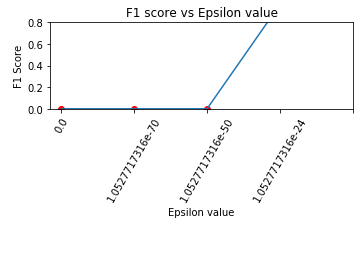

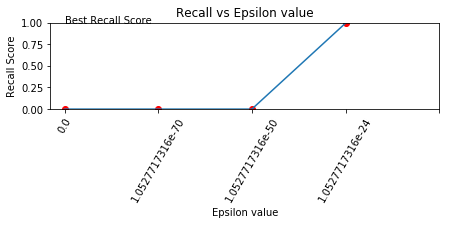

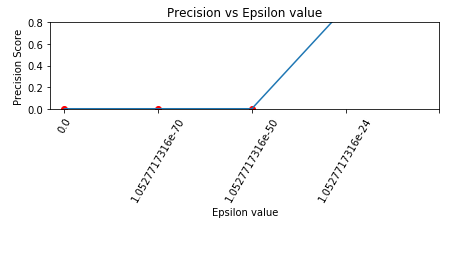

In [23]:
fscore, ep = selectThresholdByCV(p_cv,train_cv_y)

In [24]:
predictions = (p_test < ep)
print ('Printing classification report for for Test dataset')
print_classification_report(train_test_y, predictions)

Printing classification report for for Test dataset
Classification report:
             precision    recall  f1-score   support

          0       1.00      0.95      0.98     19817
          1       0.81      1.00      0.90      4081

avg / total       0.97      0.96      0.96     23898

Average Precision = 0.8113320079522863

Binary F1 Score, Recall and Precision:
F1 Score 0.895840
Recall Score 1.000000
Precision Score 0.811332

Micro F1 Score, Recall and Precision:
F1 Score 0.960290
Recall Score 0.960290
Precision Score 0.960290

Macro F1 Score, Recall and Precision:
F1 Score 0.935654
Recall Score 0.976056
Precision Score 0.905666


In [25]:
predictions = (p_cv < ep)
print ('Printing classification report for Cross Validation dataset')
print_classification_report(train_cv_y, predictions)

Printing classification report for Cross Validation dataset
Classification report:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     19816
          1       0.94      0.99      0.97      4082

avg / total       0.99      0.99      0.99     23898

Average Precision = 0.934791826456824

Binary F1 Score, Recall and Precision:
F1 Score 0.965985
Recall Score 0.994855
Precision Score 0.938742

Micro F1 Score, Recall and Precision:
F1 Score 0.988032
Recall Score 0.988032
Precision Score 0.988032

Macro F1 Score, Recall and Precision:
F1 Score 0.979362
Recall Score 0.990741
Precision Score 0.968835
